In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style("darkgrid")


x.shape= (300, 2)
y.shape= (300,)


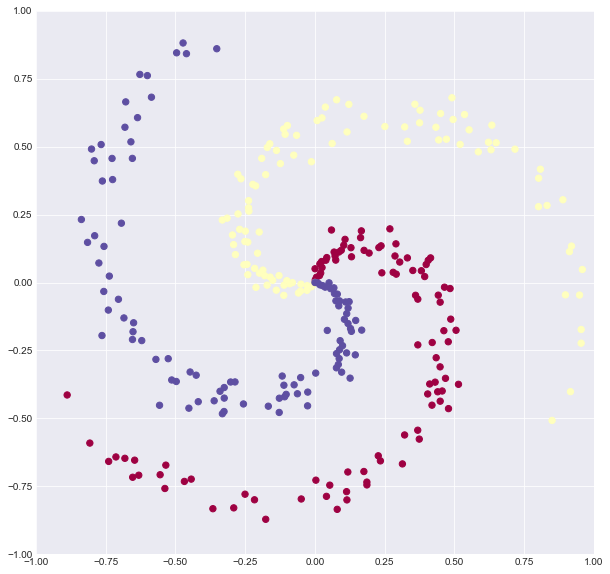

In [17]:
# 生成数据
np.random.seed(0)
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
x = np.zeros((N * K, D))
print("x.shape=", x.shape)
y = np.zeros(N * K, dtype='uint8')
print("y.shape=", y.shape)
for j in range(K):
    index = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
    x[index] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[index] = j

fig = plt.figure(figsize=(10, 10))
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()


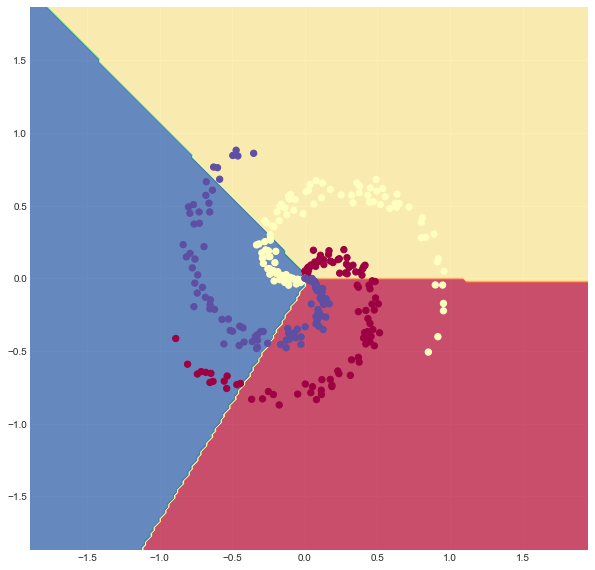

In [28]:
# softmax分类器

# 权重参数初始化
W = 0.01 * np.random.randn(D, K)
b = np.zeros((1, K))

step_size = 1e-0
reg = 1e-3

num_examples = x.shape[0]
for i in range(1000):
    scores = np.dot(x, W) + b
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # print("probs.shape=", probs.shape)

    corect_logprobs = -np.log(probs[range(num_examples), y])
    # print("corect_logprobs.shape=", corect_logprobs.shape)

    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W)
    loss = data_loss + reg_loss
    if i % 100 == 0:
        print
        "iteration %d: loss %f" % (i, loss)

        # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(x.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)

    dW += reg * W  # regularization gradient

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    scores = np.dot(x, W) + b

predicted_class = np.argmax(scores, axis=1)
print
'training accuracy: %.2f' % (np.mean(predicted_class == y))

h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# 可以看到这是线性的分类，不能正确的分类


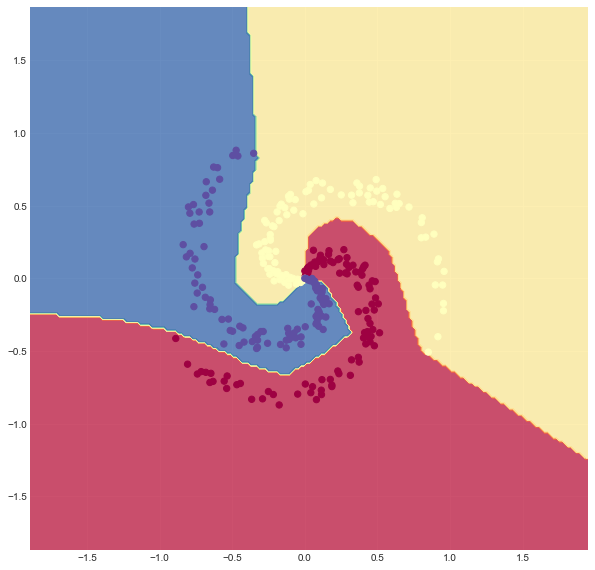

In [34]:
h = 100  # size of hidden layer
W = 0.01 * np.random.randn(D, h)  # x:300*2  2*100
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3  # regularization strength

# gradient descent loop
num_examples = x.shape[0]
for i in range(2000):
    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(x, W) + b)  # note, ReLU activation hidden_layer:300*100
    scores = np.dot(hidden_layer, W2) + b2  #scores:300*3
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs) / num_examples
    reg_loss = 0.5 * reg * np.sum(W * W) + 0.5 * reg * np.sum(W2 * W2)
    loss = data_loss + reg_loss
    if i % 100 == 0:
        print
        "iteration %d: loss %f" % (i, loss)

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(x.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
hidden_layer = np.maximum(0, np.dot(x, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print
'training accuracy: %.2f' % (np.mean(predicted_class == y))

h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

# 神经网络分类，可以很好的完成分类
